# Gradient discent

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
def f1(x_R2):
    return (x_R2[0]-3)**2+(x_R2[1]-1)**2
def grad_f1(x_R2):
    return np.array((2*(x_R2[0]-3),2*(x_R2[1]-1)))

def f2(x_R2):
    return 10*(x_R2[0]-1)**2+(x_R2[1]-2)**2
def grad_f2(x_R2):
    return np.array((20*(x_R2[0]-1),2*(x_R2[1]-2)))

def f3(x_Rn):   
    A=np.vander(np.linspace(0,1,len(x_Rn)),len(x_Rn))
    return 0.5*np.linalg.norm(A@x_Rn-A@np.ones(len(x_Rn),).T,2)**2
def grad_f3(x_Rn):
    A=np.vander(np.linspace(0,1,len(x_Rn),dtype=int),len(x_Rn))
    grad=[]
    vector=np.array(A@x_Rn-A@np.ones(len(x_Rn),).T)
    for i in range(len(x_Rn)):
        grad.append(vector[i])
    return np.array(grad)

def f4(x_Rn):
    A=np.vander(np.linspace(0,1,len(x_Rn)),len(x_Rn))
    #lambda must be from zero to one
    lambda_=0.5
    return 0.5*(np.linalg.norm(A@x_Rn-A@np.ones(len(x_Rn),).T,2)+lambda_*np.linalg.norm(x_Rn,2))
def grad_f4(x_Rn):
    A=np.vander(np.linspace(0,1,len(x_Rn)),len(x_Rn))
    lambda_=0.5
    grad=np.zeros((len(x_Rn)))
    vector1=np.array(A@x_Rn-A@np.ones(len(x_Rn),).T)
    for i in range(len(x_Rn)):
        grad[i]=lambda_*np.array(x_Rn)[i]+vector1[i]
    return np.array(grad)

def f5(x):
    return np.array((x**4+x**3-2*x**2-2*x)).reshape(1,1)
def grad_f5(x):
    return np.array((4*x**3+3*x**2-4*x-2)).reshape(1,1)

In [60]:
def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.
    
    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x),2)**2 :
        alpha = tau * alpha
        
        if alpha < 1e-3:
            break
    return alpha


In [61]:
def GD(f,grad_f,x0=(2.8,0.1),tolf=10e-6,tolx=10e-6,kmax=1000,back=True):
    #As output x as stationary point
    #f<-val a vector containing the values of f during the iterations
    #err_vall a vector containing the values of || grad of f(x,k)||
    alpha=0.01
    #initialization:
    f_val=np.zeros((kmax+1,))
    err_val=np.zeros((kmax+1,))
    k=0
    try:
        x_k=np.array(x0)
        x_km1=np.zeros((len(x0),))
    except:
        x_k=np.array(x0).reshape(1,1)
        x_km1=np.array(0).reshape(1,1)
    cond1=True
    cond2=True                                         
    while(cond1 and cond2 and k<kmax):
        x_km1=x_k
        if back==True:
             alpha=backtracking(f,grad_f,x_k)
        else:
            alpha=alpha
        x_k=x_k-alpha*grad_f(x_k)  
        f_val[k]=f(x_k)
        k+=1
        err_val[k]=np.linalg.norm(grad_f(x_k),2)
        cond1=np.linalg.norm(grad_f(x_k),2)>tolf*np.linalg.norm(grad_f(x0),2) 
        cond2=np.linalg.norm(x_k-x_km1,2)>tolx*np.linalg.norm(x_km1,2)
    s="" 
    if back==True:
       s="backtracking"
    else:
        s="constant alpha"
    print("number of iterations for "+s+" is : ", k)
    return x_k,f_val,err_val,k


In [62]:
#Plotting function
def Plot(vec_error_a_const,k1,vec_err_back,k2):
    
    x1=np.linspace(0,k1-1,k1,dtype=int)
    y1=np.array(vec_error_a_const[:k1])
    
    x2=np.linspace(0,k2-1,k2,dtype=int)
    y2=np.array(vec_err_back[:k2])
    print(y2.shape)
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(x1[1:], y1[1:], 'o', color='red')
    plt.title("Norm 2 of the gradient of f, alpha const")
    plt.xlabel("number of iterations")
    plt.ylabel("| gradient of f(x_k)|")
    plt.grid()
    
    plt.subplot(1, 2, 2)
    plt.plot(x2[1:], y2[1:], 'o', color='red')
    plt.title("Norm 2 of the gradient of f, backtraking")
    plt.xlabel("number of iterations")
    plt.ylabel("| gradient of f(x_k)|")
    plt.grid()
   
    
    plt.show()
    return True

#### Punto 1
Funzione 1

number of iterations for constant alpha is :  335
[2.9988499  0.99896491]
number of iterations for backtracking is :  66
[2.99985122 0.9998661 ]
(66,)


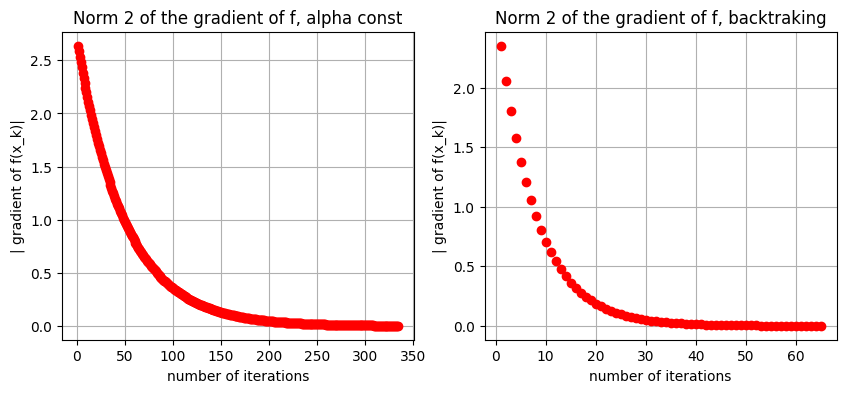

True

In [63]:
x_k,fval1,errvec1const,k1const=GD(f1,grad_f1,(2,0.1),back=False)
print(x_k)
x_k,fvall1,errvec1back,k1back=GD(f1,grad_f1,(2,0.1),back=True)
print(x_k)
Plot(errvec1const,k1const,errvec1back,k1back)

Funzione 2

number of iterations for constant alpha is :  338
[1.         1.99891754]
number of iterations for backtracking is :  71
[1.        1.9998444]
(71,)


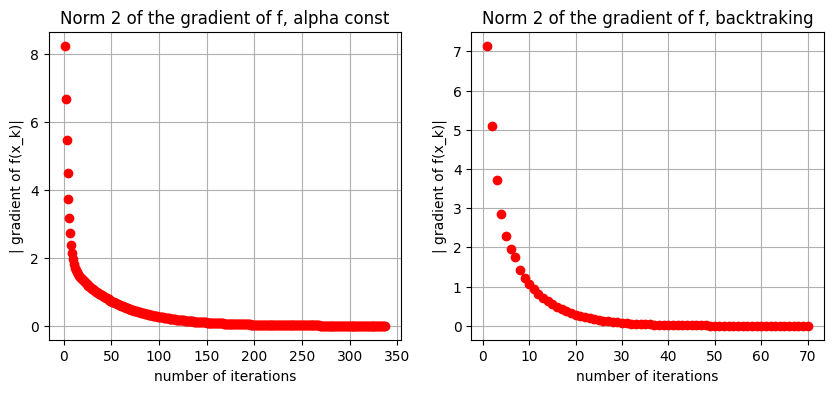

True

In [64]:
x_k,fval2,errvec2const,k2const=GD(f2,grad_f2,(0.5,1),back=False)
print(x_k)
x_k,fval2,errvec2back,k2back=GD(f2,grad_f2,(0.5,1),back=True)
print(x_k)
Plot(errvec2const,k2const,errvec2back,k2back)

Funzione 3

number of iterations for constant alpha is :  1000
[-832818.86598345 -832819.86598345 -832818.86598345 -832818.86598345
 1300493.59467773]
number of iterations for backtracking is :  1000
[ 0.25759264 -0.74240736  0.25759264  0.25759264  2.53819744]
(1000,)


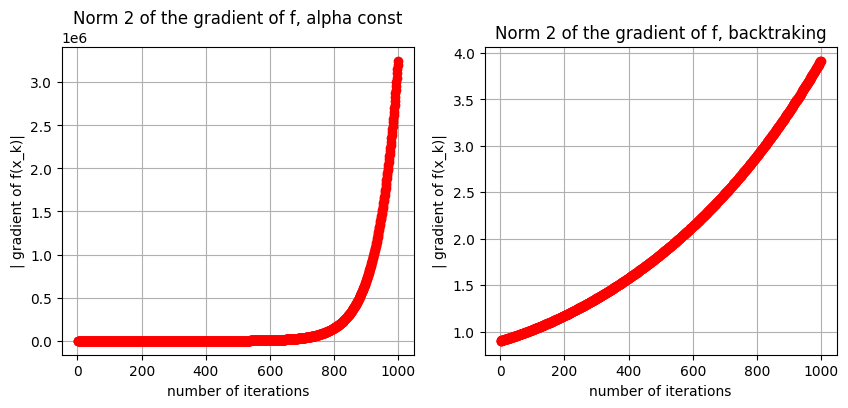

True

In [65]:
x_k,fval3,errvec3const,k3const=GD(f3,grad_f3,(1,0,1,1,1),back=False)
print(x_k)
x_k,fval3,errvec3back,k3back=GD(f3,grad_f3,(1,0,1,1,1),back=True)
print(x_k)
Plot(errvec3const,k3const,errvec3back,k3back)

Funzione 4

number of iterations for constant alpha is :  1000
[-619.8004997  -580.84519481 -424.99515488  -35.30486235  753.18735477]
number of iterations for backtracking is :  1000
[ 0.36715959 -0.2130943   0.54713641  0.91916995  1.6515605 ]
(1000,)


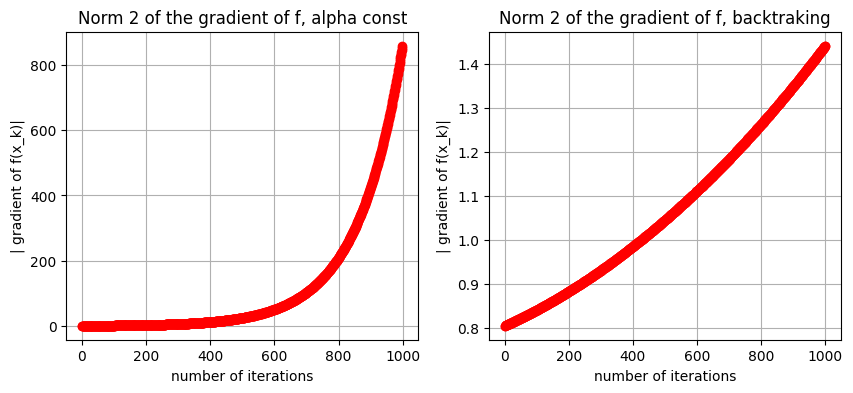

True

In [66]:
x_k,fval4,errvec4const,k4const=GD(f4,grad_f4,(1,0,1,1,1),back=False) 
print(x_k)
x_k,fval4,errvec4back,k4back=GD(f4,grad_f4,(1,0,1,1,1),back=True) 
print(x_k)
Plot(errvec4const,k4const,errvec4back,k4back)

Funzione 5

number of iterations for constant alpha is :  70
[[0.9222868]]
number of iterations for backtracking is :  53
[[0.92225903]]
(53,)


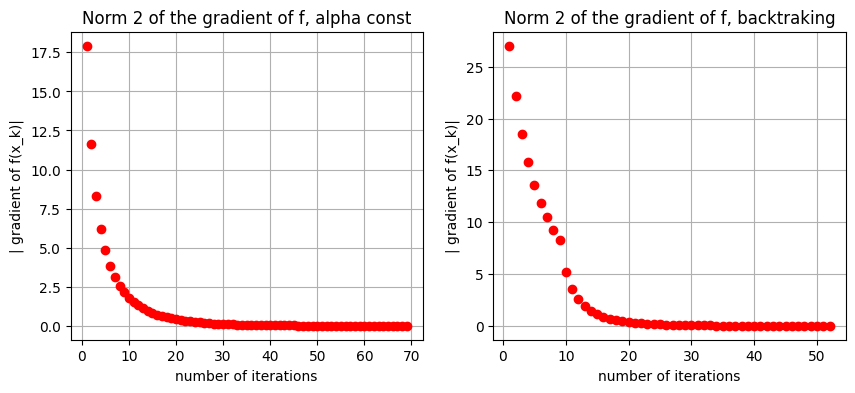

True

In [67]:
x_k,fval5,errvec5const,k5const=GD(f5,grad_f5,(2),back=False)
print(x_k)
x_k,fval5,errvec5back,k5back=GD(f5,grad_f5,(2),back=True)
print(x_k)
Plot(errvec5const,k5const,errvec5back,k5back)